<a href="https://colab.research.google.com/github/dk-tran92/ML/blob/main/Nhan_dang_mau_Friday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bayesian Linear Regression with Pyro
##Install Pyro

In [31]:
!pip install pyro-ppl

##Related Libraries

In [32]:
import time         # We will time our execution often

import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Load Database

In [33]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

print(f'Data shape is {X.shape}')
print(f'Target shape is {y.shape}')

Data shape is (442, 10)
Target shape is (442,)


##Data Description
"Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n=442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline."

- 10 features: age, sex, body mass index, average blood pressure, and six blood serum measurements
- Response: a quantitative measure of disease progression after 1 year

In [34]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [35]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [36]:
diabetes.target[0]

151.0

In [37]:
features_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
features_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


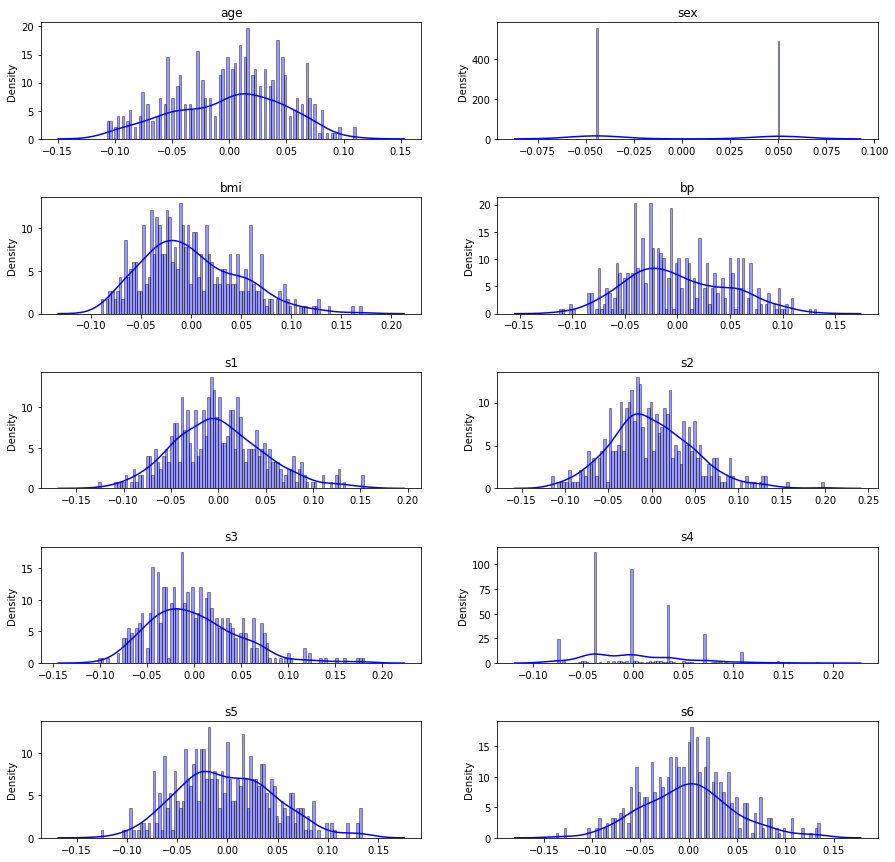

In [38]:
def draw_features(features_df):
    figure, axis = plt.subplots(5,2, figsize=(15,15))


    for key, ax in zip(features_df.columns, axis.ravel()):
        ax.set_title(key)
        sns.distplot(features_df[key], 
                     ax=ax, 
                     bins=100, 
                     color="blue", 
                     kde=True, 
                     axlabel=False, 
                     hist_kws=dict(edgecolor="black"))

    plt.subplots_adjust(hspace=0.5)
    plt.show()
    
draw_features(features_df)

In [39]:
diabetes.data[:,1]*10+0.5

array([1.00680119, 0.05358363, 1.00680119, 0.05358363, 0.05358363,
       0.05358363, 1.00680119, 1.00680119, 1.00680119, 0.05358363,
       0.05358363, 1.00680119, 0.05358363, 1.00680119, 0.05358363,
       1.00680119, 0.05358363, 1.00680119, 0.05358363, 0.05358363,
       0.05358363, 1.00680119, 0.05358363, 1.00680119, 0.05358363,
       1.00680119, 0.05358363, 0.05358363, 0.05358363, 1.00680119,
       0.05358363, 0.05358363, 1.00680119, 0.05358363, 0.05358363,
       1.00680119, 0.05358363, 0.05358363, 1.00680119, 1.00680119,
       1.00680119, 0.05358363, 1.00680119, 0.05358363, 1.00680119,
       1.00680119, 0.05358363, 0.05358363, 1.00680119, 1.00680119,
       0.05358363, 1.00680119, 0.05358363, 0.05358363, 0.05358363,
       0.05358363, 0.05358363, 0.05358363, 0.05358363, 1.00680119,
       0.05358363, 1.00680119, 1.00680119, 0.05358363, 1.00680119,
       1.00680119, 1.00680119, 1.00680119, 1.00680119, 0.05358363,
       0.05358363, 0.05358363, 1.00680119, 1.00680119, 1.00680

Text(0.5, 1.0, 'Distribution of sex')

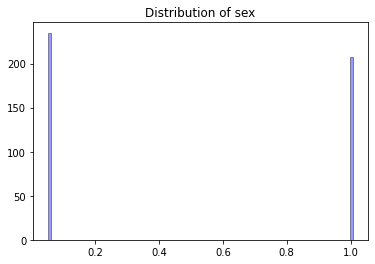

In [40]:
sns.distplot(diabetes.data[:,1]*10+0.5,
              bins=100, 
              color="blue", 
              kde=False, 
              axlabel=False, 
              hist_kws=dict(edgecolor="black"))
plt.title("Distribution of sex")


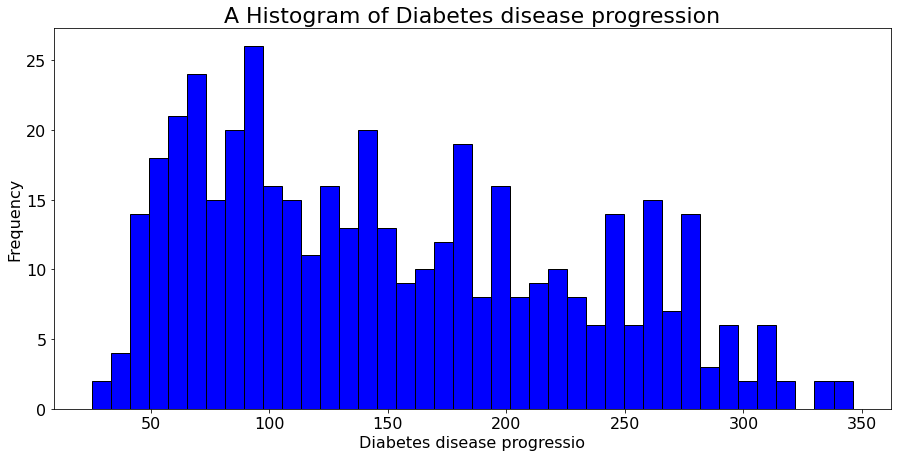

In [41]:
plt.figure(figsize=(15,7))
plt.hist(y, bins=40, color="blue", edgecolor="black")
plt.xlabel("Diabetes disease progressio", size=16)
plt.ylabel("Frequency", size=16)
plt.title("A Histogram of Diabetes disease progression", size=22)
plt.xticks(size=16)
plt.yticks(size=16)
plt.show()

Ta thấy dạng phân phối của y không phải là phân phối chuẩn mà có vẻ như là một phân phối Gamma (dương và bị lệch)

##Train test split


In [42]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


##Tradiational Linear Regression

In [43]:
# start timing
start_time = time.time()

# fit linear regression
my_linear_regression = LinearRegression().fit(X_train,y_train)
y_pred = my_linear_regression.predict(X_test)

end_time = time.time()

# print point estimates of the coefficients
print(f"beta_intercept: {round(my_linear_regression.intercept_, 2)}")
for i, col in enumerate(diabetes.feature_names):
    print(f"beta_{col}: {round(my_linear_regression.coef_[i], 2)}")

beta_intercept: 151.91
beta_age: -41.86
beta_sex: -249.05
beta_bmi: 502.12
beta_bp: 320.29
beta_s1: -925.43
beta_s2: 605.87
beta_s3: 170.54
beta_s4: 226.6
beta_s5: 801.45
beta_s6: 54.85


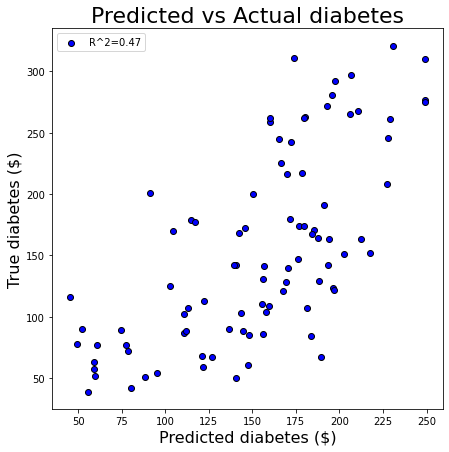

In [44]:
def plot_all_observations(y_true, y_pred, y_max):
    
    y_pred_censored = np.where(y_pred > y_max, y_max, y_pred)
    
    plt.figure(figsize=(7, 7))
    plt.scatter(y_pred_censored, y_test, 
                c="blue", edgecolor="black", 
                label=f'R^2={round(r2_score(y_test, y_pred_censored),2)}')
    
    plt.title("Predicted vs Actual diabetes", size=22)
    plt.xlabel("Predicted diabetes ($)", size=16)
    plt.ylabel("True diabetes ($)", size=16)
    plt.ticklabel_format(style='plain')
    plt.legend()
    
    plt.show()
    
    
    
# Now let's call our function
y_censor_label = y_train.max()
plot_all_observations(y_test, y_pred, y_censor_label)

# Bayesion Linear Regression with Pyro


In [45]:
# import all required Pyro/Pytorch libraries
import torch
torch.set_default_tensor_type(torch.FloatTensor) # set the default to float32

import pyro
import pyro.distributions as dist

# We will use Markov Chain Monte Carlo (MCMC) methods here, specifically the No U-Turn Sampler (NUTS)
from pyro.infer import MCMC, NUTS

In [46]:
def model_normal(X, y, column_names):
    
    # Define our intercept prior
    intercept_prior = dist.Normal(0.0, 1.0)
    linear_combination = pyro.sample(f"beta_intercept", intercept_prior)
    
    
    # Also define coefficient priors
    for i in range(X.shape[1]):
        coefficient_prior = dist.Normal(0.0, 1.0)
        beta_coef = pyro.sample(f"beta_{column_names[i]}", coefficient_prior)
        linear_combination = linear_combination + (X[:, i] * beta_coef)
    
    
    # Define a sigma prior for the random error
    sigma = pyro.sample("sigma", dist.HalfNormal(scale=10.0))
    
    # For a simple linear model, the expected mean is the linear combination of parameters
    mean = linear_combination
    
    
    with pyro.plate("data", y.shape[0]):
        
        # Assume our expected mean comes from a normal distribution with the mean which
        # depends on the linear combination, and a standard deviatin "sigma"
        outcome_dist = dist.Normal(mean, sigma)
        
        # Condition the expected mean on the observed target y
        observation = pyro.sample("obs", outcome_dist, obs=y)

In [47]:
SAMPLE_NUMBER = 353


# Turn out numpy data into PyTorch 
# tensors
X_train_torch = torch.tensor(X_train)
y_train_torch = torch.tensor(y_train)



# Clear the parameter storage
pyro.clear_param_store()

# Initialize our No U-Turn Sampler
my_kernel = NUTS(model_normal, 
                 max_tree_depth=7) # a shallower tree helps the algorithm run faster

# Employ the sampler in an MCMC sampling 
# algorithm, and sample 353 samples. 
# Then discard the first 53
my_mcmc1 = MCMC(my_kernel,
                num_samples=SAMPLE_NUMBER,
                warmup_steps=53)


# Let's time our execution as well
start_time = time.time()

# Run the sampler
my_mcmc1.run(X_train_torch, 
             y_train_torch,
             diabetes.feature_names)

end_time = time.time()

print()
print(f'Inference ran for {round((end_time -  start_time)/60.0, 2)} minutes')

Sample: 100%|██████████| 406/406 [02:38,  2.57it/s, step size=9.17e-02, acc. prob=0.957]


Inference ran for 2.63 minutes


In [48]:
my_mcmc1.summary()


                      mean       std    median      5.0%     95.0%     n_eff     r_hat
        beta_age      0.05      0.90      0.03     -1.29      1.61    294.35      1.00
        beta_bmi      0.10      0.98      0.10     -1.47      1.66    351.43      1.00
         beta_bp      0.11      0.91      0.08     -1.35      1.60    289.29      1.01
  beta_intercept      2.85      0.95      2.85      1.28      4.30    235.81      1.00
         beta_s1      0.07      0.91      0.10     -1.43      1.63    454.93      1.00
         beta_s2     -0.03      1.06     -0.02     -2.02      1.49    601.64      1.00
         beta_s3     -0.00      1.06      0.01     -1.72      1.77    406.99      1.00
         beta_s4     -0.03      1.09      0.02     -1.90      1.66    246.45      1.01
         beta_s5     -0.08      0.98     -0.08     -1.59      1.61    319.92      1.00
         beta_s6      0.03      0.96      0.05     -1.58      1.36    303.92      1.00
        beta_sex     -0.08      0.95     -

In [49]:
beta_df = pd.DataFrame(my_mcmc1.get_samples())
beta_df.head()

,beta_age,beta_bmi,beta_bp,beta_intercept,beta_s1,beta_s2,beta_s3,beta_s4,beta_s5,beta_s6,beta_sex,sigma
0,-0.183015,-0.397937,1.309655,0.836854,1.599319,-1.969920,1.131219,-1.130224,1.579408,0.004535,-0.816469,139.231662
1,0.662744,-0.724804,1.591075,4.759573,-0.548190,-0.363890,-1.907270,-2.399574,0.930710,1.083068,-0.619646,132.818308
2,1.594183,0.539351,0.668130,2.780397,-1.367254,0.478989,-0.700038,-0.809409,1.543911,-0.781578,1.151336,135.142981
3,0.792982,1.151920,1.217303,2.431338,-0.286227,0.667717,-1.132517,-1.325132,0.460993,-0.568865,0.704512,134.765547
4,-0.061702,-1.116134,-0.198316,2.552886,0.791393,-0.391001,0.697410,0.234114,0.190013,-0.782078,-0.089779,138.797744


In [50]:
def predict_linear_combination(beta_df, X):
    
    # Don't grab the last column, that is our estimate of the error standard deviation, "sigma"
    coefficients = beta_df.iloc[:, :-1].mean()

    # Find our linear combination again
    linear_combination = X.dot(coefficients[1:]) + coefficients.iloc[0]
    
    return linear_combination

In [51]:
linear_combination = predict_linear_combination(beta_df, X_test)
# Our predictions are the linear combination
y_pred = linear_combination

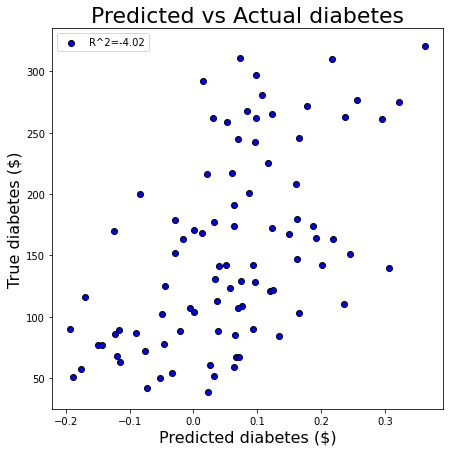

In [52]:
plot_all_observations(y_test, y_pred, y_censor_label)

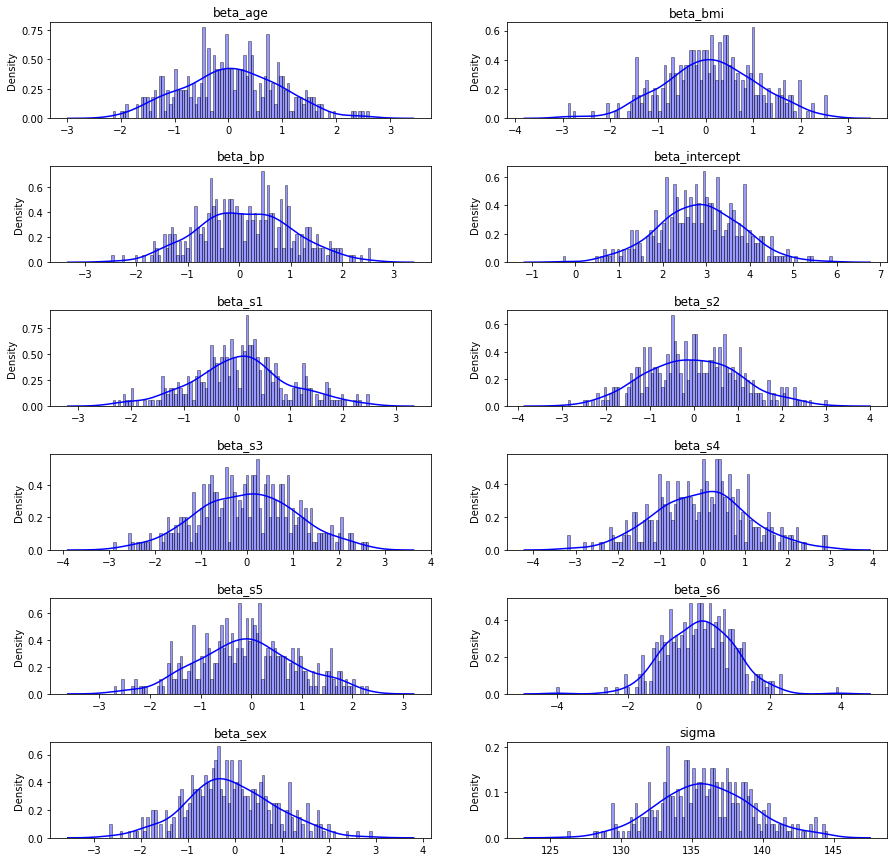

In [53]:
def draw_coefficients(beta_df):
    figure, axis = plt.subplots(6,2, figsize=(15,15))


    for key, ax in zip(beta_df.columns, axis.ravel()):
        ax.set_title(key)
        sns.distplot(beta_df[key], 
                     ax=ax, 
                     bins=100, 
                     color="blue", 
                     kde=True, 
                     axlabel=False, 
                     hist_kws=dict(edgecolor="black"))

    plt.subplots_adjust(hspace=0.5)
    plt.show()
    
draw_coefficients(beta_df)

##Sample only 100 samples

In [54]:
SAMPLE_NUMBER = 100


# Turn out numpy data into PyTorch 
# tensors
X_train_torch = torch.tensor(X_train)
y_train_torch = torch.tensor(y_train)



# Clear the parameter storage
pyro.clear_param_store()

# Initialize our No U-Turn Sampler
my_kernel = NUTS(model_normal, 
                 max_tree_depth=7) # a shallower tree helps the algorithm run faster

# Employ the sampler in an MCMC sampling 
# algorithm, and sample 100 samples. 
# Then discard the first 10
my_mcmc2 = MCMC(my_kernel,
                num_samples=SAMPLE_NUMBER,
                warmup_steps=10)


# Let's time our execution as well
start_time = time.time()

# Run the sampler
my_mcmc2.run(X_train_torch, 
             y_train_torch,
             diabetes.feature_names)

end_time = time.time()

print()
print(f'Inference ran for {round((end_time -  start_time)/60.0, 2)} minutes')

Sample: 100%|██████████| 110/110 [01:59,  1.09s/it, step size=1.50e-02, acc. prob=0.981]


Inference ran for 2.0 minutes


In [55]:
my_mcmc2.summary()


                      mean       std    median      5.0%     95.0%     n_eff     r_hat
        beta_age     -0.01      1.05      0.06     -1.81      1.49     19.02      1.02
        beta_bmi      0.08      0.95      0.13     -1.45      1.55     27.53      1.01
         beta_bp      0.18      0.93      0.16     -1.14      1.69     32.57      1.00
  beta_intercept      2.81      0.87      2.87      1.19      4.07     37.03      1.05
         beta_s1     -0.26      0.97     -0.25     -1.84      1.22     61.29      1.03
         beta_s2      0.13      1.05      0.21     -2.14      1.31     33.43      0.99
         beta_s3      0.09      0.96     -0.06     -1.40      1.52     31.67      1.05
         beta_s4     -0.01      0.96     -0.04     -1.60      1.39     43.72      1.00
         beta_s5     -0.10      0.81     -0.22     -1.63      0.92     59.13      1.01
         beta_s6      0.05      1.18      0.14     -2.02      1.67     35.09      0.99
        beta_sex      0.07      1.01      

In [56]:
beta_df_2 = pd.DataFrame(my_mcmc2.get_samples())
beta_df_2.head()

,beta_age,beta_bmi,beta_bp,beta_intercept,beta_s1,beta_s2,beta_s3,beta_s4,beta_s5,beta_s6,beta_sex,sigma
0,-0.294713,-0.516016,1.198222,2.280556,0.077939,-0.990125,-0.265650,-0.791125,-0.396595,0.363189,0.070193,133.924268
1,0.041423,0.390824,-0.829327,2.380543,0.022526,0.263758,-0.866440,-1.597425,1.244399,-1.776628,-1.512894,131.407269
2,0.765069,2.153333,0.252617,3.495051,1.012501,0.384142,0.111468,0.157799,-0.042955,0.563178,0.445947,138.877632
3,1.790564,1.186084,1.841841,3.564459,-1.374796,0.081322,-0.357199,-0.642299,0.120560,1.585621,1.314571,139.261453
4,0.533864,0.101900,1.126409,1.363663,-0.189215,0.192235,-0.606695,-1.190170,0.092502,-1.132221,1.652602,136.878826


In [57]:
def predict_linear_combination(beta_df, X):
    
    # Don't grab the last column, that is our estimate of the error standard deviation, "sigma"
    coefficients = beta_df.iloc[:, :-1].mean()

    # Find our linear combination again
    linear_combination = X.dot(coefficients[1:]) + coefficients.iloc[0]
    
    return linear_combination

In [58]:
linear_combination_2 = predict_linear_combination(beta_df_2, X_test)
# Our predictions are the linear combination
y_pred = linear_combination_2

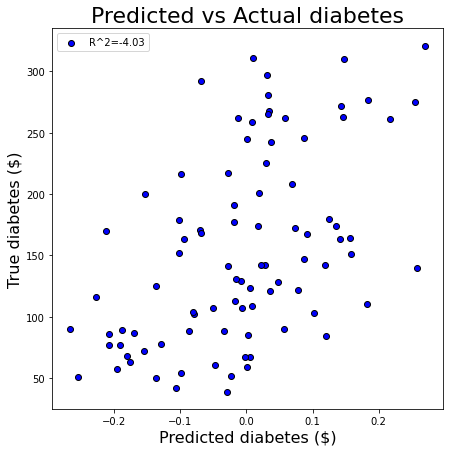

In [59]:
plot_all_observations(y_test, y_pred, y_censor_label)

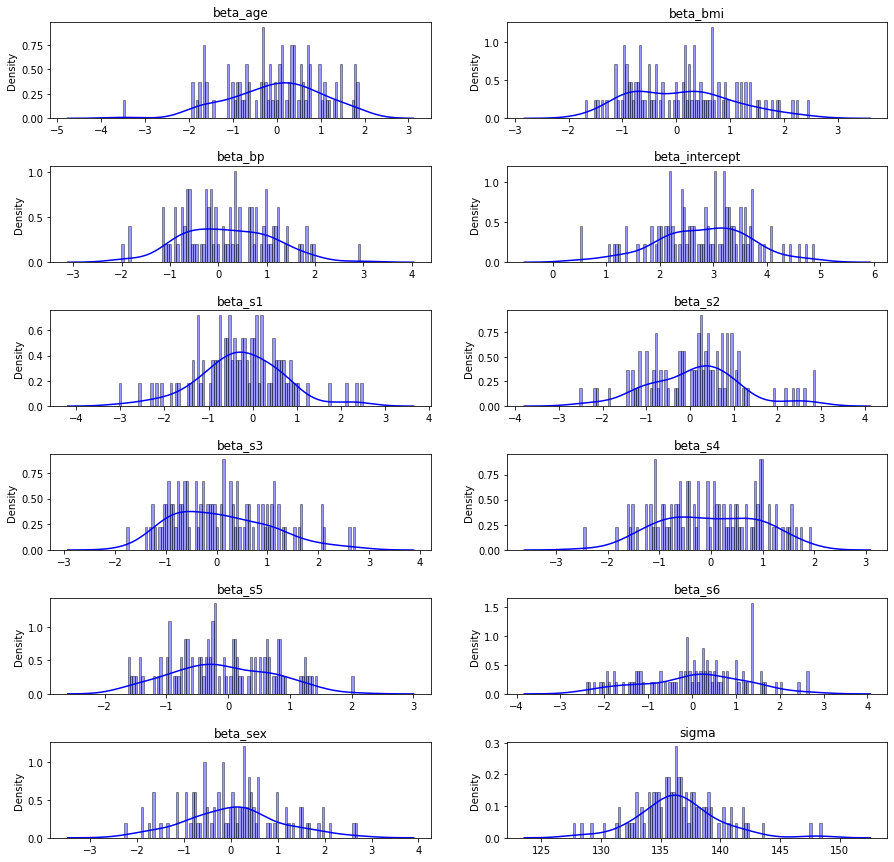

In [60]:
def draw_coefficients(beta_df):
    figure, axis = plt.subplots(6,2, figsize=(15,15))


    for key, ax in zip(beta_df.columns, axis.ravel()):
        ax.set_title(key)
        sns.distplot(beta_df[key], 
                     ax=ax, 
                     bins=100, 
                     color="blue", 
                     kde=True, 
                     axlabel=False, 
                     hist_kws=dict(edgecolor="black"))

    plt.subplots_adjust(hspace=0.5)
    plt.show()
    
draw_coefficients(beta_df_2)

In [61]:
def model_normal_2(X, y, column_names):
    
    # Define our intercept prior
    intercept_prior = dist.Normal(0.0, 1.0)
    linear_combination = pyro.sample(f"beta_intercept", intercept_prior)
    
    
    # Also define coefficient priors
    for i in range(X.shape[1]):
        coefficient_prior = dist.Normal(0.0, 1.0)
        beta_coef = pyro.sample(f"beta_{column_names[i]}", coefficient_prior)
        linear_combination = linear_combination + (X[:, i] * beta_coef)
    
    
    # Define a sigma prior for the random error
    sigma = pyro.sample("sigma", dist.Normal(0.0, 10.0))
    
    # For a simple linear model, the expected mean is the linear combination of parameters
    mean = linear_combination
    
    
    with pyro.plate("data", y.shape[0]):
        
        # Assume our expected mean comes from a normal distribution with the mean which
        # depends on the linear combination, and a standard deviatin "sigma"
        outcome_dist = dist.Normal(mean, sigma)
        
        # Condition the expected mean on the observed target y
        observation = pyro.sample("obs", outcome_dist, obs=y)

In [62]:
SAMPLE_NUMBER = 353


# Turn out numpy data into PyTorch 
# tensors
X_train_torch = torch.tensor(X_train)
y_train_torch = torch.tensor(y_train)



# Clear the parameter storage
pyro.clear_param_store()

# Initialize our No U-Turn Sampler
my_kernel = NUTS(model_normal, 
                 max_tree_depth=7) # a shallower tree helps the algorithm run faster

# Employ the sampler in an MCMC sampling 
# algorithm, and sample 353 samples. 
# Then discard the first 53
my_mcmc3 = MCMC(my_kernel,
                num_samples=SAMPLE_NUMBER,
                warmup_steps=53)


# Let's time our execution as well
start_time = time.time()

# Run the sampler
my_mcmc3.run(X_train_torch, 
             y_train_torch,
             diabetes.feature_names)

end_time = time.time()

print()
print(f'Inference ran for {round((end_time -  start_time)/60.0, 2)} minutes')

Sample: 100%|██████████| 406/406 [03:33,  1.90it/s, step size=4.97e-02, acc. prob=0.904]


Inference ran for 3.55 minutes


In [63]:
my_mcmc3.summary()


                      mean       std    median      5.0%     95.0%     n_eff     r_hat
        beta_age      0.04      0.92      0.10     -1.80      1.16    391.37      1.00
        beta_bmi      0.05      0.93      0.07     -1.22      1.75    346.90      1.00
         beta_bp      0.01      1.07     -0.01     -1.62      1.71    270.11      1.00
  beta_intercept      2.82      1.01      2.82      0.99      4.20    341.76      1.00
         beta_s1     -0.04      1.04      0.00     -1.88      1.45    274.86      1.00
         beta_s2      0.06      1.00      0.05     -1.68      1.51    140.53      1.00
         beta_s3     -0.03      0.95     -0.05     -1.53      1.58    398.11      1.00
         beta_s4      0.03      1.08     -0.02     -1.83      1.63    276.93      1.00
         beta_s5     -0.02      1.11      0.05     -2.02      1.60    306.01      1.02
         beta_s6      0.04      0.95      0.12     -1.53      1.59    438.00      1.00
        beta_sex      0.06      1.08      

In [68]:
beta_df_3 = pd.DataFrame(my_mcmc3.get_samples())
beta_df_3.head()

,beta_age,beta_bmi,beta_bp,beta_intercept,beta_s1,beta_s2,beta_s3,beta_s4,beta_s5,beta_s6,beta_sex,sigma
0,-1.605847,-0.028887,-0.007475,3.472662,0.272374,-0.441603,2.130022,-0.041254,-1.483332,-0.488521,0.385090,135.019280
1,1.310667,-0.803283,0.851529,3.690613,0.215632,0.152494,0.165938,0.787272,0.799026,0.506225,0.200520,136.094615
2,-0.210738,-0.030150,1.271093,3.360628,1.053302,0.589021,0.011007,0.620447,1.078080,1.203328,0.474002,132.666800
3,-0.671349,-0.720952,0.676584,2.578338,-0.171080,1.633665,0.951407,-0.447275,0.222112,0.079025,-0.166178,133.178886
4,0.147581,-0.804684,0.512733,3.564108,0.845581,-0.397262,-0.224169,0.387221,0.259356,-0.243760,0.951367,138.446370


In [69]:
linear_combination_3 = predict_linear_combination(beta_df_3, X_test)
# Our predictions are the linear combination
y_pred = linear_combination_3

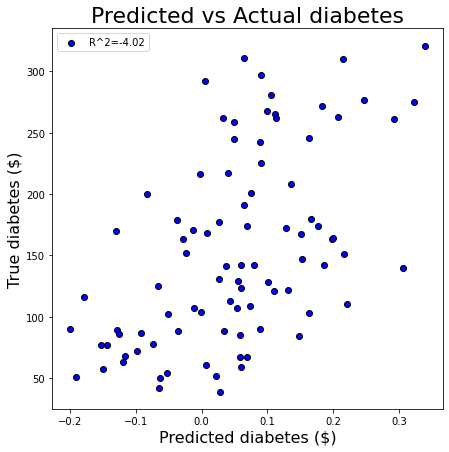

In [70]:
plot_all_observations(y_test, y_pred, y_censor_label)

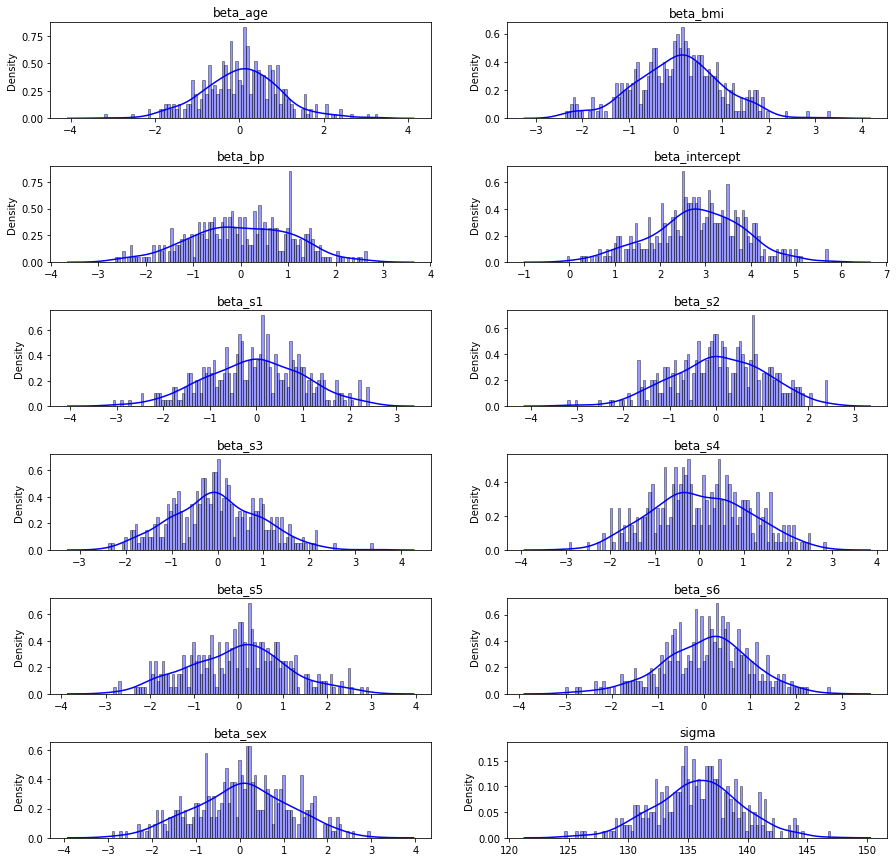

In [71]:
def draw_coefficients(beta_df):
    figure, axis = plt.subplots(6,2, figsize=(15,15))


    for key, ax in zip(beta_df.columns, axis.ravel()):
        ax.set_title(key)
        sns.distplot(beta_df[key], 
                     ax=ax, 
                     bins=100, 
                     color="blue", 
                     kde=True, 
                     axlabel=False, 
                     hist_kws=dict(edgecolor="black"))

    plt.subplots_adjust(hspace=0.5)
    plt.show()
    
draw_coefficients(beta_df_3)